#  <h1 align="center"><font size="6">Classification with Python</font></h1>


## Data Cleaning

### Import libraries

Let's first load required libraries:

In [1]:
# We Will Import the Libraries that we need.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


### Upload The Data

In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-10-16 16:20:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-10-16 16:20:10 (219 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [4]:
# We will import the file from the Exil (spreadsheet).
data = pd.read_csv("loan_train.csv")
data

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


### look at the data

In [5]:
# Look at the head of the data.
data.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [6]:
# Look at the tail of the data.
data.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [7]:
# Look at the form (shape) of the data (Dimensions of Dataset).
data.shape

(346, 10)

In [8]:
# Look at the columns names.
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [9]:
# We are looking for duplicate rows.
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [12]:
# We are looking for types of the columns in the data.
data.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

### Data Tuning

#### Convert to date time object


In [13]:
# We will the tupes of the two columns [(due_date), (effective_date)] into date time.
data['due_date'] = pd.to_datetime(data['due_date'])
data['effective_date'] = pd.to_datetime(data['effective_date'])
data

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [14]:
# We are looking for types of the columns in the data after change.
data.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

#### Drop the unimportant columns

In [15]:
# we will drop [('Unnamed: 0.1'), ('Unnamed: 0')] columns Because it does not contain any information of interest to us.
data.drop(['Unnamed: 0.1', 'Unnamed: 0'], inplace= True, axis=1)
data

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [16]:
# Look at the form (shape) of the data after drop 'ID' column.
data.shape

(346, 8)

#### Make a new data frame 

We will make a new data frame to divided it into Categorical and Numerical & Drop columns ['effective_date' , 'due_date'].

In [17]:
# We will copy the data in df data frame.
df = data.copy()
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [18]:
# we will drop [('effective_date'), ('due_date')] columns Because it does not contain any information of interest to us.
df.drop(['effective_date', 'due_date'], inplace= True, axis=1)
df

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,High School or Below,male
1,PAIDOFF,1000,30,33,Bechalor,female
2,PAIDOFF,1000,15,27,college,male
3,PAIDOFF,1000,30,28,college,female
4,PAIDOFF,1000,30,29,college,male
...,...,...,...,...,...,...
341,COLLECTION,800,15,32,High School or Below,male
342,COLLECTION,1000,30,25,High School or Below,male
343,COLLECTION,800,15,39,college,male
344,COLLECTION,1000,30,28,college,male


### Divide the Data into Categorical and Numerical

#### Categorical Data

In [19]:
# The Categorical data are columns : ['loan_status','education','Gender']
categorical_data= df[['loan_status','education','Gender']]

In [20]:
# Look at categorical_data
categorical_data

,loan_status,education,Gender
0,PAIDOFF,High School or Below,male
1,PAIDOFF,Bechalor,female
2,PAIDOFF,college,male
3,PAIDOFF,college,female
4,PAIDOFF,college,male
...,...,...,...
341,COLLECTION,High School or Below,male
342,COLLECTION,High School or Below,male
343,COLLECTION,college,male
344,COLLECTION,college,male


In [21]:
# Show the shape of the categorical data.
categorical_data.shape

(346, 3)

In [22]:
# Chick the dtype of the categorical data.
categorical_data.dtypes

loan_status    object
education      object
Gender         object
dtype: object

#### Numerical Data

In [23]:
# The Numerical data is the rest of the columns.
numerical_data= df.drop(categorical_data, axis= 1)

In [24]:
# Look at numerical_data
numerical_data

,Principal,terms,age
0,1000,30,45
1,1000,30,33
2,1000,15,27
3,1000,30,28
4,1000,30,29
...,...,...,...
341,800,15,32
342,1000,30,25
343,800,15,39
344,1000,30,28


In [25]:
# show the shape of numerical data.
numerical_data.shape

(346, 3)

In [26]:
# Chick the dtype of the numerical data.
numerical_data.dtypes

Principal    int64
terms        int64
age          int64
dtype: object

## Data Analysis

### Statistical summary

In [27]:
# descriptions
# df.describe()

### Data Visualization

In [28]:
# Matrix form for correlation data
dff = df.corr()
dff

,Principal,terms,age
Principal,1.000000,0.521876,-0.060893
terms,0.521876,1.000000,-0.064762
age,-0.060893,-0.064762,1.000000


<AxesSubplot:>

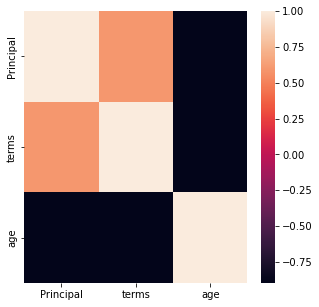

In [29]:
plt.figure(figsize=(5,5))
sns.heatmap(dff.corr())

<AxesSubplot:>

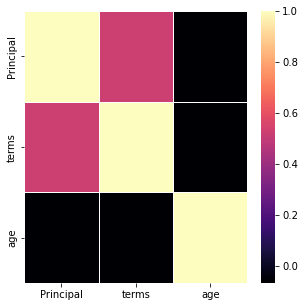

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(dff,cmap='magma',linecolor='white',linewidths=1)

<AxesSubplot:>

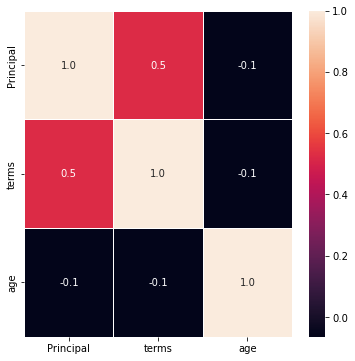

In [31]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

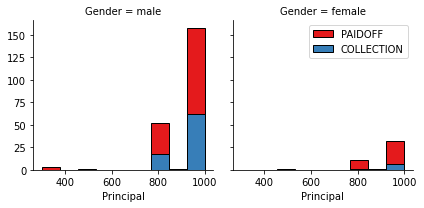

In [32]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

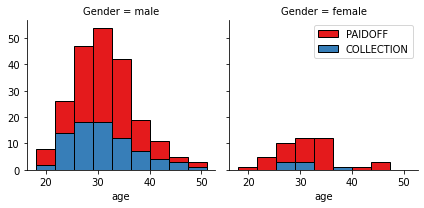

In [33]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Data Analysis without scaling

#### Normal Data without scaling

##### Label Encoding

###### Preprocessing

In [34]:
# We Will do preprocessing for Label Encoding.
le = preprocessing.LabelEncoder()

###### fit_transform 

In [35]:
# In this step we will compute and apply the transformation in a single step.
# Create an instance of categorical_data with apply fit_transform.
label_encoder=categorical_data.apply(le.fit_transform)
label_encoder.head(2)

,loan_status,education,Gender
0,1,1,1
1,1,0,0


In [36]:
# Look at label_encoder
label_encoder

,loan_status,education,Gender
0,1,1,1
1,1,0,0
2,1,3,1
3,1,3,0
4,1,3,1
...,...,...,...
341,0,1,1
342,0,1,1
343,0,3,1
344,0,3,1


In [37]:
# Look at label_encoder types
label_encoder.dtypes

loan_status    int64
education      int64
Gender         int64
dtype: object

In [38]:
# we Here we have created a new data frame that includes numerical_data and label_encoder.
data_label_encoded=pd.concat([numerical_data, label_encoder], axis=1)
data_label_encoded.head(2)

,Principal,terms,age,loan_status,education,Gender
0,1000,30,45,1,1,1
1,1000,30,33,1,0,0


In [39]:
# Look at data_label_encoded.
data_label_encoded

,Principal,terms,age,loan_status,education,Gender
0,1000,30,45,1,1,1
1,1000,30,33,1,0,0
2,1000,15,27,1,3,1
3,1000,30,28,1,3,0
4,1000,30,29,1,3,1
...,...,...,...,...,...,...
341,800,15,32,0,1,1
342,1000,30,25,0,1,1
343,800,15,39,0,3,1
344,1000,30,28,0,3,1


In [40]:
# Look at data_label_encoded shape.
data_label_encoded.shape

(346, 6)

##### Splitting the features and target

###### Input

In [41]:
#  we have created a new data frame that includes all inputs or All features or characteristics affecting on the target column.
x = data_label_encoded.drop(['loan_status'],axis=1)

In [42]:
# Look at x
x

,Principal,terms,age,education,Gender
0,1000,30,45,1,1
1,1000,30,33,0,0
2,1000,15,27,3,1
3,1000,30,28,3,0
4,1000,30,29,3,1
...,...,...,...,...,...
341,800,15,32,1,1
342,1000,30,25,1,1
343,800,15,39,3,1
344,1000,30,28,3,1


In [43]:
# Look at the shap of x 
x.shape

(346, 5)

###### Output

In [44]:
# we have created a new data frame that includes the output or the target column.
y = data_label_encoded['loan_status']

In [45]:
# Look at y
y

0      1
1      1
2      1
3      1
4      1
      ..
341    0
342    0
343    0
344    0
345    0
Name: loan_status, Length: 346, dtype: int64

In [46]:
# Look at the content of the data inside the target column.
y.unique()

array([1, 0])

In [47]:
# Look at the number of the data inside the target column.
y.nunique()

2

In [48]:
# The Target column distribution 'Gender'
print(data.groupby('loan_status').size())

loan_status
COLLECTION     86
PAIDOFF       260
dtype: int64


Number of PAIDOFF:  260
Number of COLLECTION :  86


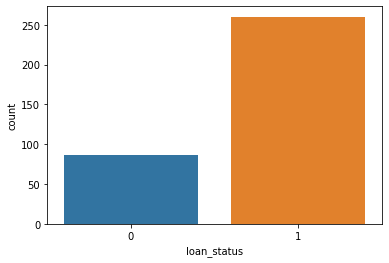

In [49]:
ax = sns.countplot(y,label="Count")       
PAIDOFF, COLLECTION = y.value_counts()
print('Number of PAIDOFF: ',PAIDOFF)
print('Number of COLLECTION : ',COLLECTION)

##### Split the data to train and test

In [50]:
# we are split the dataset into train and test sets to evaluate how well our machine learning model performs.
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Data Analysis with scaling

#### Normal Data with scaling

##### Create new Data frame 

In [51]:
# We are creating new data frame to use it in Data with scaling.
df_1 = df.copy()

In [52]:
df_1

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,High School or Below,male
1,PAIDOFF,1000,30,33,Bechalor,female
2,PAIDOFF,1000,15,27,college,male
3,PAIDOFF,1000,30,28,college,female
4,PAIDOFF,1000,30,29,college,male
...,...,...,...,...,...,...
341,COLLECTION,800,15,32,High School or Below,male
342,COLLECTION,1000,30,25,High School or Below,male
343,COLLECTION,800,15,39,college,male
344,COLLECTION,1000,30,28,college,male


##### Divide the Data into Categorical and Numerical

###### Categorical Data

In [53]:
# The Categorical data are columns : ['loan_status','education','Gender']
categorical_data_1= df_1[['loan_status','education','Gender']]

In [54]:
# Look at categorical_data
categorical_data_1

,loan_status,education,Gender
0,PAIDOFF,High School or Below,male
1,PAIDOFF,Bechalor,female
2,PAIDOFF,college,male
3,PAIDOFF,college,female
4,PAIDOFF,college,male
...,...,...,...
341,COLLECTION,High School or Below,male
342,COLLECTION,High School or Below,male
343,COLLECTION,college,male
344,COLLECTION,college,male


In [55]:
# Show the shape of the categorical data.
categorical_data_1.shape

(346, 3)

In [56]:
# Chick the dtype of the categorical data.
categorical_data_1.dtypes

loan_status    object
education      object
Gender         object
dtype: object

###### Numerical Data

In [57]:
# The Numerical data is the rest of the columns.
numerical_data_1= df_1.drop(categorical_data_1, axis= 1)

In [58]:
# Look at numerical_data
numerical_data_1

,Principal,terms,age
0,1000,30,45
1,1000,30,33
2,1000,15,27
3,1000,30,28
4,1000,30,29
...,...,...,...
341,800,15,32
342,1000,30,25
343,800,15,39
344,1000,30,28


In [59]:
# show the shape of numerical data.
numerical_data_1.shape

(346, 3)

In [60]:
# Chick the dtype of the numerical data.
numerical_data_1.dtypes

Principal    int64
terms        int64
age          int64
dtype: object

##### Label Encoding

###### Preprocessing

In [61]:
# We Will do preprocessing for Label Encoding.
le_1 = preprocessing.LabelEncoder()

###### fit_transform 

In [62]:
# In this step we will compute and apply the transformation in a single step.
# Create an instance of categorical_data with apply fit_transform.
label_encoder_1=categorical_data_1.apply(le_1.fit_transform)
label_encoder_1.head(2)

,loan_status,education,Gender
0,1,1,1
1,1,0,0


In [63]:
# Look at label_encoder
label_encoder_1

,loan_status,education,Gender
0,1,1,1
1,1,0,0
2,1,3,1
3,1,3,0
4,1,3,1
...,...,...,...
341,0,1,1
342,0,1,1
343,0,3,1
344,0,3,1


In [64]:
# Look at label_encoder types
label_encoder_1.dtypes

loan_status    int64
education      int64
Gender         int64
dtype: object

In [65]:
# we Here we have created a new data frame that includes numerical_data and label_encoder.
data_label_encodedd=pd.concat([numerical_data_1, label_encoder_1], axis=1)
data_label_encodedd.head(2)

,Principal,terms,age,loan_status,education,Gender
0,1000,30,45,1,1,1
1,1000,30,33,1,0,0


In [66]:
# Look at data_label_encodedd.
data_label_encodedd

,Principal,terms,age,loan_status,education,Gender
0,1000,30,45,1,1,1
1,1000,30,33,1,0,0
2,1000,15,27,1,3,1
3,1000,30,28,1,3,0
4,1000,30,29,1,3,1
...,...,...,...,...,...,...
341,800,15,32,0,1,1
342,1000,30,25,0,1,1
343,800,15,39,0,3,1
344,1000,30,28,0,3,1


In [67]:
# Look at data_label_encoded shape.
data_label_encodedd.shape

(346, 6)

##### Splitting the features and target

######  input

In [68]:
X = data_label_encodedd.drop(['loan_status'],axis=1)
X.head()

,Principal,terms,age,education,Gender
0,1000,30,45,1,1
1,1000,30,33,0,0
2,1000,15,27,3,1
3,1000,30,28,3,0
4,1000,30,29,3,1


In [69]:
X

,Principal,terms,age,education,Gender
0,1000,30,45,1,1
1,1000,30,33,0,0
2,1000,15,27,3,1
3,1000,30,28,3,0
4,1000,30,29,3,1
...,...,...,...,...,...
341,800,15,32,1,1
342,1000,30,25,1,1
343,800,15,39,3,1
344,1000,30,28,3,1


######  output

In [70]:
Y = data_label_encodedd['loan_status'].values

In [71]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##### Split the data to train and test

In [72]:
# we are split the dataset into train and test sets to evaluate how well our machine learning model performs.
# split data train 70 % and test 30 %
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

##### StandardScaler

In [73]:
# preprocessing.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
X_train= scaler.fit_transform(X_train)
X_train

array([[ 0.52505253, -0.96403525,  0.12258423, -0.66859033,  0.3863337 ],
       [ 0.52505253,  0.91999303, -0.51734701,  1.05704505,  0.3863337 ],
       [ 0.52505253,  0.91999303, -0.19738139, -0.66859033,  0.3863337 ],
       ...,
       [-1.41554162, -0.96403525,  1.88239515, -0.66859033,  0.3863337 ],
       [ 0.52505253, -0.96403525, -0.3573642 , -0.66859033,  0.3863337 ],
       [ 0.52505253, -0.96403525, -1.31726107,  1.05704505,  0.3863337 ]])

In [75]:
X_test= scaler.transform(X_test)
X_test

array([[ 0.52505253,  0.91999303,  1.0824811 , -1.53140802,  0.3863337 ],
       [ 0.52505253, -0.96403525,  0.44254985, -0.66859033,  0.3863337 ],
       [ 0.52505253,  0.91999303, -0.51734701, -1.53140802,  0.3863337 ],
       [ 0.52505253, -1.96885033, -0.03739858,  1.05704505,  0.3863337 ],
       [ 0.52505253, -0.96403525,  1.40244672, -0.66859033,  0.3863337 ],
       [ 0.52505253, -0.96403525, -0.99729544, -0.66859033, -2.58843582],
       [ 0.52505253,  0.91999303, -1.7972095 , -0.66859033,  0.3863337 ],
       [ 0.52505253,  0.91999303, -0.83731263,  1.05704505,  0.3863337 ],
       [-1.41554162, -0.96403525,  1.72241234, -0.66859033,  0.3863337 ],
       [ 0.52505253,  0.91999303, -0.3573642 ,  1.05704505,  0.3863337 ],
       [ 0.52505253, -0.96403525, -0.83731263,  1.05704505,  0.3863337 ],
       [ 0.52505253,  0.91999303, -0.19738139, -0.66859033, -2.58843582],
       [ 0.52505253,  0.91999303,  0.60253266, -1.53140802, -2.58843582],
       [ 0.52505253, -0.96403525,  0.4

## Model Training

###    Without Scaling

#### DecisionTreeRegressor

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

regressor = DecisionTreeRegressor(max_depth=3)

regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [77]:
text_representation = tree.export_text(regressor, feature_names = x.columns.tolist())

print(text_representation)

|--- age <= 26.50
|   |--- terms <= 22.50
|   |   |--- terms <= 11.00
|   |   |   |--- value: [1.00]
|   |   |--- terms >  11.00
|   |   |   |--- value: [0.72]
|   |--- terms >  22.50
|   |   |--- Gender <= 0.50
|   |   |   |--- value: [1.00]
|   |   |--- Gender >  0.50
|   |   |   |--- value: [0.39]
|--- age >  26.50
|   |--- Gender <= 0.50
|   |   |--- age <= 29.50
|   |   |   |--- value: [0.75]
|   |   |--- age >  29.50
|   |   |   |--- value: [1.00]
|   |--- Gender >  0.50
|   |   |--- terms <= 11.00
|   |   |   |--- value: [1.00]
|   |   |--- terms >  11.00
|   |   |   |--- value: [0.76]



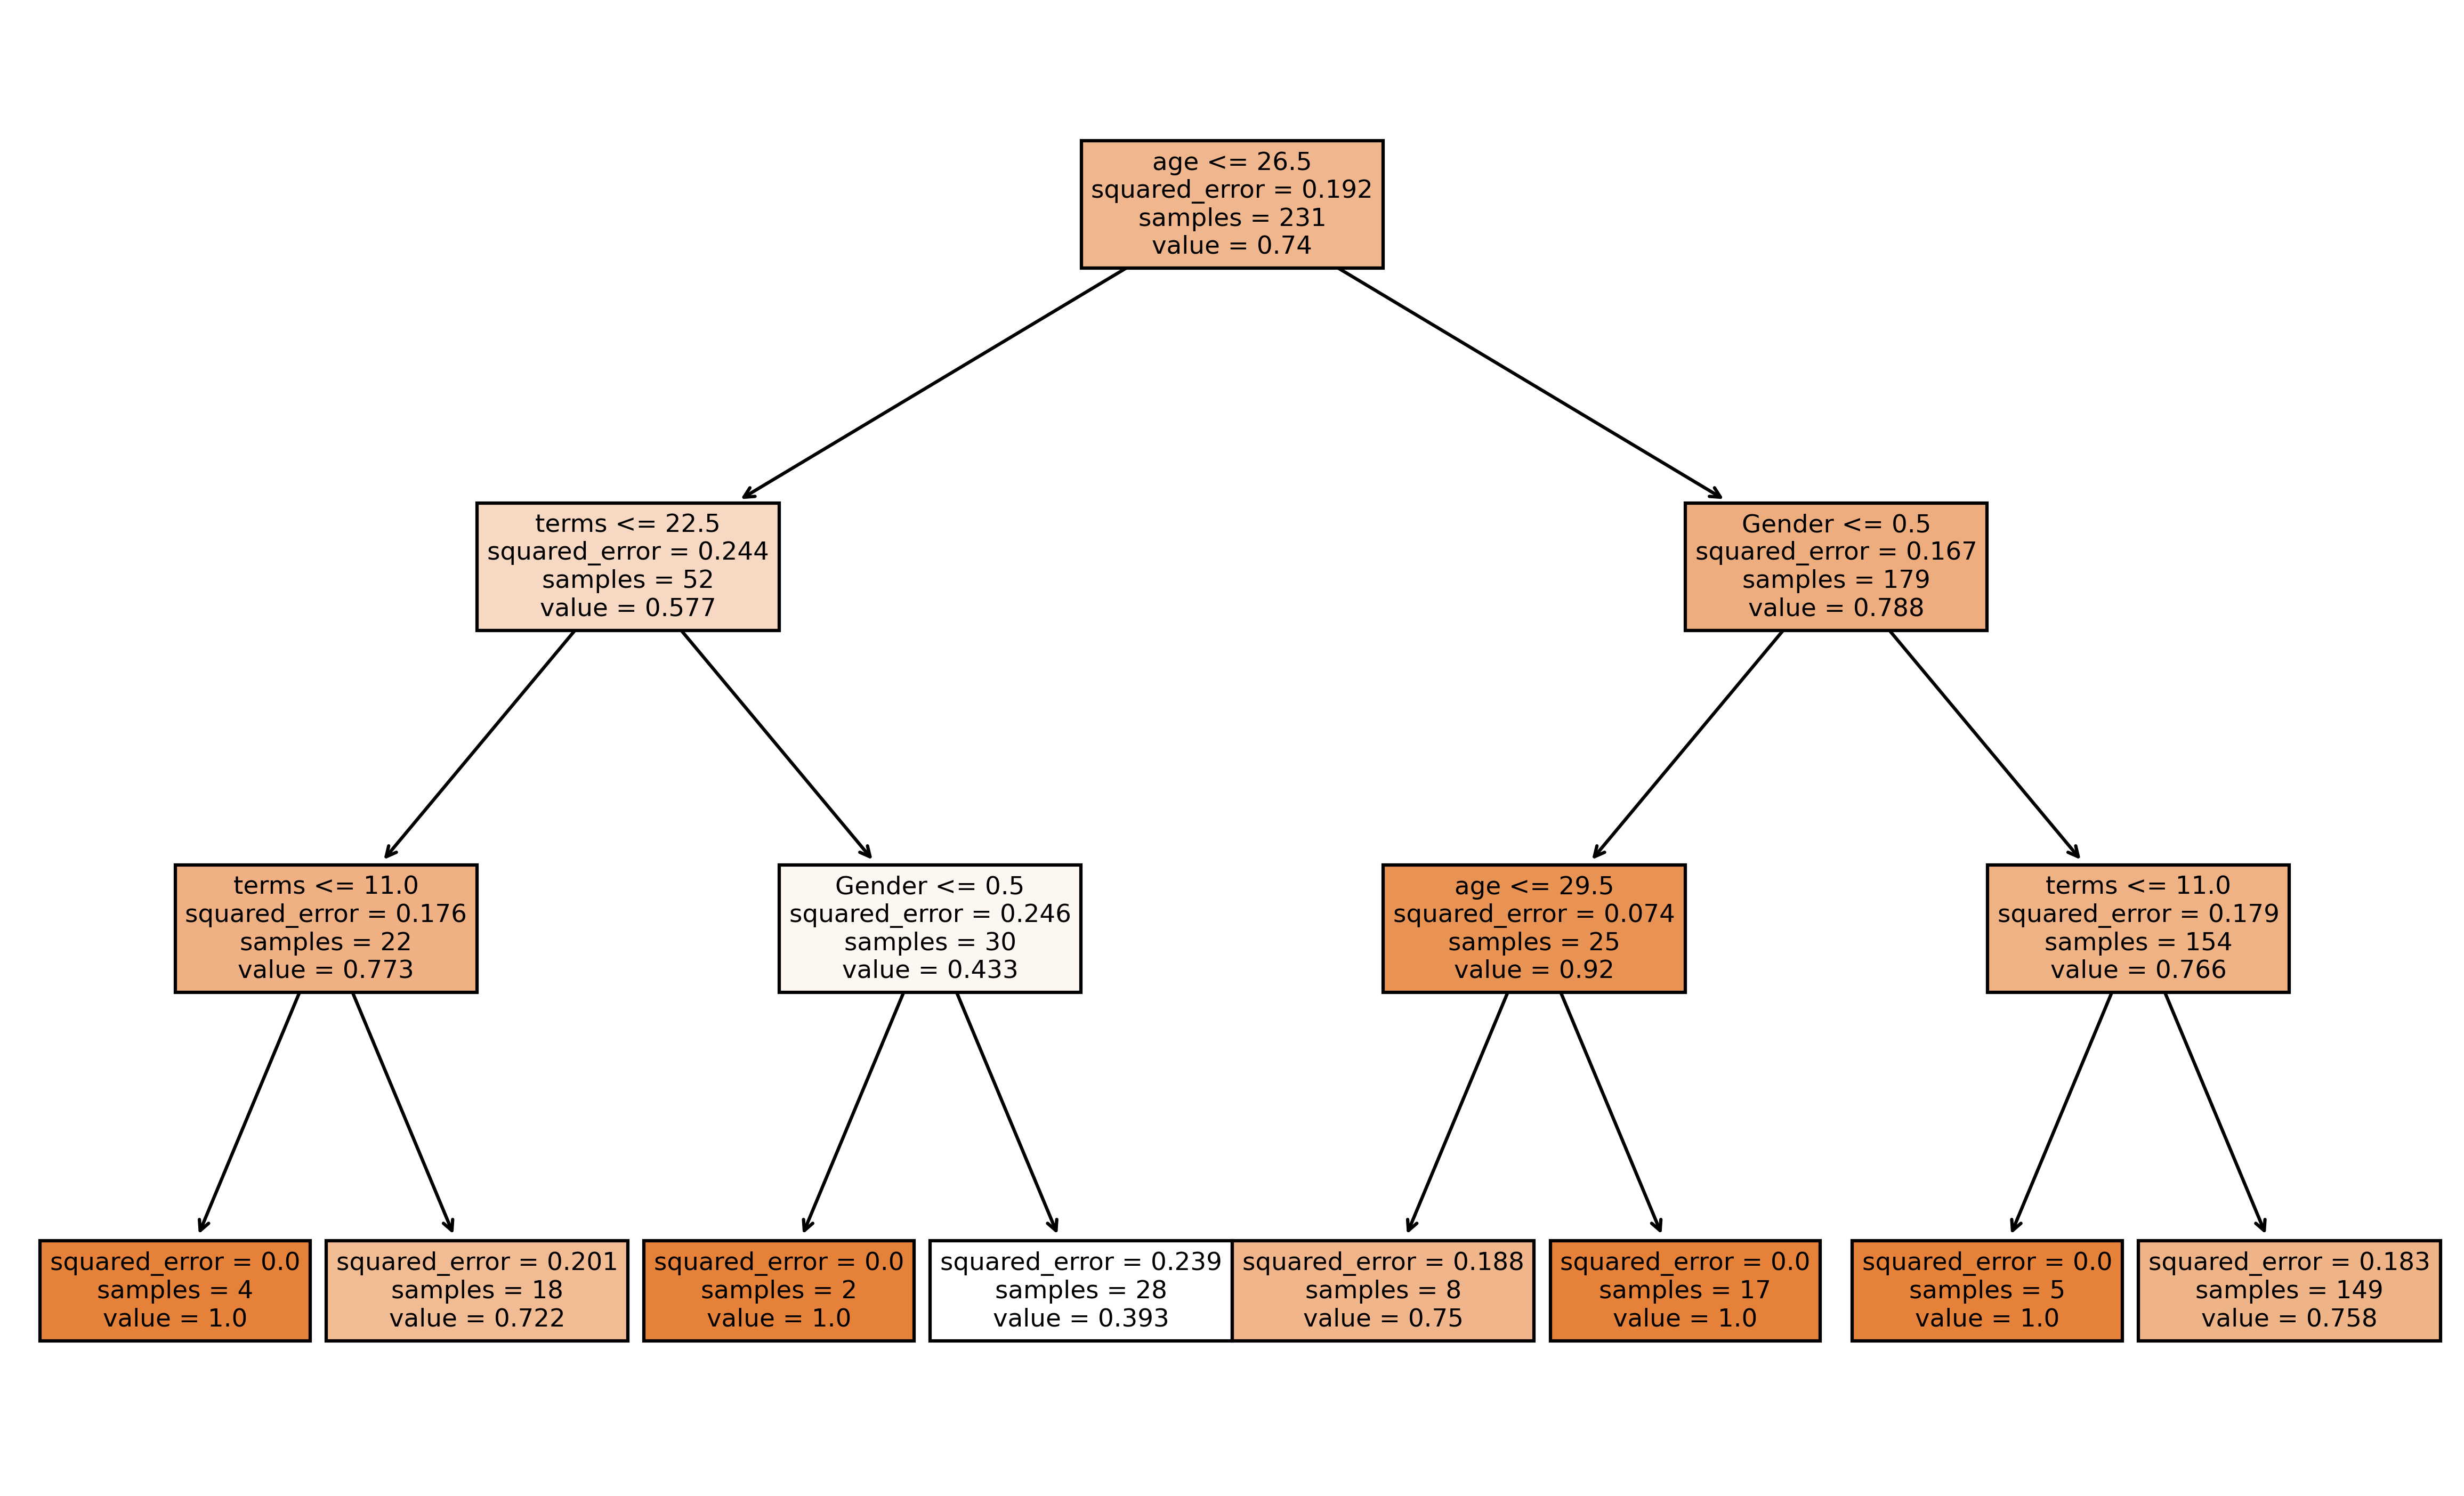

In [78]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,8), dpi=450)

_ =tree.plot_tree(regressor,  feature_names=x.columns,  filled=True)

In [79]:
importances = regressor.feature_importances_

importances

array([0.        , 0.37508902, 0.40014284, 0.        , 0.22476815])

In [80]:
pd.DataFrame(importances, index = x.columns, columns=["Importance"])

,Importance
Principal,0.000000
terms,0.375089
age,0.400143
education,0.000000
Gender,0.224768


<AxesSubplot:>

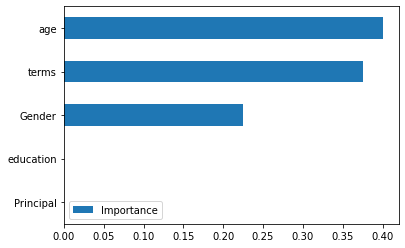

In [81]:
pd.DataFrame(importances, index = x.columns, columns=["Importance"]).sort_values(by='Importance'). plot(kind='barh')

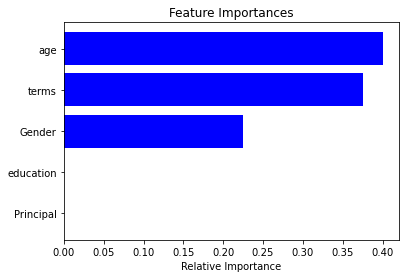

In [82]:
features = x.columns

importances = regressor.feature_importances_

indices = np.argsort(importances)


plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='b', align='center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

#### DecisionTreeClassifier

###### f1-score 

In [83]:
 # we assign the output to an object called classifier_tree.
classifier_tree = DecisionTreeClassifier(random_state=55)

In [84]:
# Here, we are using DecisionTreeClassifier as a Machine Learning model to fit the data.
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
y_predict = classifier_tree.fit(x_train, y_train).predict(x_test)

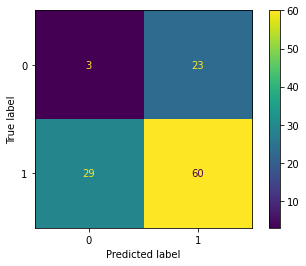

In [85]:
# We will plotting the confusion matrix.
plot_confusion_matrix(classifier_tree , x_test, y_test)

In [86]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, y_predict))

[[ 3 23]
 [29 60]]


In [87]:
# Here we have printed classification report for the classifier.
# print(classification_report(y_test, y_predict, target_names=le.classes_))
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.09      0.12      0.10        26
           1       0.72      0.67      0.70        89

    accuracy                           0.55       115
   macro avg       0.41      0.39      0.40       115
weighted avg       0.58      0.55      0.56       115



###### jaccard_score

In [88]:
jaccard_score(y_test,  y_predict)

0.5357142857142857

In [89]:
jaccard_score(y_test,  y_predict, average='macro')

0.29512987012987013

In [90]:
jaccard_score(y_test,  y_predict, average=None)

array([0.05454545, 0.53571429])

#### Logestic Regression

###### f1-score 

In [91]:
# Next, we need to create our model by instantiating an instance of the LogisticRegression object.
model_ = LogisticRegression(random_state=1)

In [92]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our 
# x_train and y_train variables
model_.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [93]:
# Making Predictions With Our Logistic Regression Model
predictions = model_.predict(x_test)

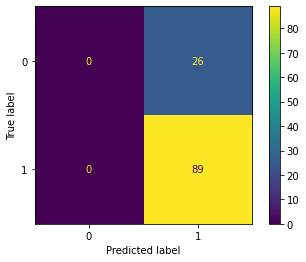

In [94]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_, x_test, y_test)

In [95]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions))

[[ 0 26]
 [ 0 89]]


In [96]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        26
           1      0.774     1.000     0.873        89

    accuracy                          0.774       115
   macro avg      0.387     0.500     0.436       115
weighted avg      0.599     0.774     0.675       115



###### jaccard_score

In [97]:
jaccard_score(y_test,  predictions)

0.7739130434782608

In [98]:
jaccard_score(y_test,  predictions, average='macro')

0.3869565217391304

In [99]:
jaccard_score(y_test,  predictions, average=None)

array([0.        , 0.77391304])

######  log loss

In [100]:
log_loss(y_test,  predictions)

7.808947615659678

#### K-Nearest Neighbors(KNN)

######  f1_score for Normal Knn

In [101]:
# Next, we need to create our model by instantiating an instance of the K-Nearest Neighbors(KNN) object.
knn = KNeighborsClassifier()

In [102]:
# To train the model, we need to call the fit method on the K-Nearest Neighbors(KNN) object we just created and pass in our 
# x_train and y_train variables
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [103]:
# Making Predictions With Our K-Nearest Neighbors(KNN) Model.
predictions_ = knn.predict(x_test)

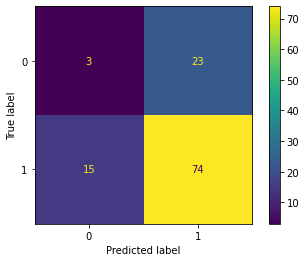

In [104]:
# We will plotting the confusion matrix.
plot_confusion_matrix(knn, x_test, y_test)

In [105]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions_))

[[ 3 23]
 [15 74]]


In [106]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, predictions_, digits=3))

              precision    recall  f1-score   support

           0      0.167     0.115     0.136        26
           1      0.763     0.831     0.796        89

    accuracy                          0.670       115
   macro avg      0.465     0.473     0.466       115
weighted avg      0.628     0.670     0.647       115



###### jaccard_score for Normal KNN

In [107]:
jaccard_score(y_test, predictions_)

0.6607142857142857

In [108]:
jaccard_score(y_test, predictions_, average='macro')

0.36694250871080136

In [109]:
jaccard_score(y_test, predictions_, average=None)

array([0.07317073, 0.66071429])

###### Elbow

In [110]:
test_error_rates = []
train_error_rates= []

# Loop over K values

for k in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train,y_train) 
   
    y_pred___ = knn_model.predict(x_test)
    y_pred_train = knn_model.predict(x_train)
    
# Compute training and test data accuracy
    
    test_error = 1 - accuracy_score(y_test,y_pred___)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

Text(0.5, 0, 'K Value')

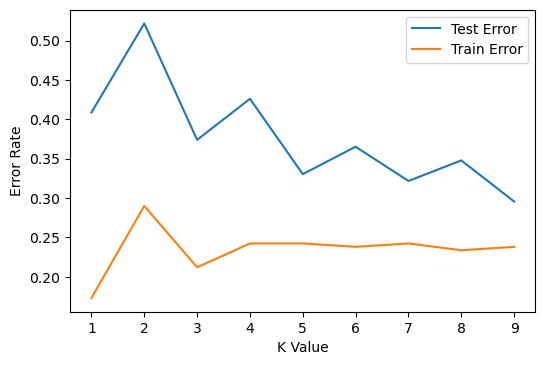

In [111]:
# we plotting Test error & Train error.
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,10),test_error_rates,label='Test Error')

plt.plot(range(1,10),train_error_rates,label='Train Error')

plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [112]:
# Next, we need to create our model by instantiating an instance of the K-Nearest Neighbors(KNN) Elbow object.
knn_model = KNeighborsClassifier(n_neighbors=32)

In [113]:
# To train the model, we need to call the fit method on the K-Nearest Neighbors(KNN) Elbow object we just created and pass 
# in our x_train and y_train variables
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=32)

In [114]:
# Making Predictions With Our K-Nearest Neighbors(KNN) Elbow Model.
y_pred_3 = knn_model.predict(x_test)

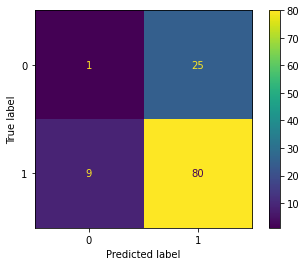

In [115]:
# We will plotting the confusion matrix.
plot_confusion_matrix(knn_model, x_test, y_test)

In [116]:
# Here we have printed confusion matrix for the classifier.
confusion_matrix(y_test, y_pred_3) 

array([[ 1, 25],
       [ 9, 80]])

In [117]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.10      0.04      0.06        26
           1       0.76      0.90      0.82        89

    accuracy                           0.70       115
   macro avg       0.43      0.47      0.44       115
weighted avg       0.61      0.70      0.65       115



###### jaccard_score for elbow

In [118]:
jaccard_score(y_test, y_pred_3)

0.7017543859649122

In [119]:
jaccard_score(y_test, y_pred_3, average='macro')

0.3651629072681704

In [120]:
jaccard_score(y_test, y_pred_3, average=None)

array([0.02857143, 0.70175439])

#### SVM

##### Linear Kernel 

###### f1_score

In [121]:
svclassifierl = SVC(kernel='linear')
svclassifierl.fit(x_train, y_train)

SVC(kernel='linear')

In [122]:
y_predd = svclassifierl.predict(x_test)

In [123]:
print(confusion_matrix(y_test,y_predd))
print(classification_report(y_test,y_predd))

[[ 0 26]
 [ 0 89]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      1.00      0.87        89

    accuracy                           0.77       115
   macro avg       0.39      0.50      0.44       115
weighted avg       0.60      0.77      0.68       115



###### jaccard_score

In [124]:
jaccard_score(y_test, y_predd)

0.7739130434782608

In [125]:
jaccard_score(y_test, y_predd, average='macro')

0.3869565217391304

In [126]:
jaccard_score(y_test, y_predd, average=None)

array([0.        , 0.77391304])

##### Polynomial Kernel 

###### f1_score

In [127]:
svclassifierp = SVC(kernel='poly', degree=8)
svclassifierp.fit(x_train, y_train)

SVC(degree=8, kernel='poly')

In [128]:
y_predp = svclassifierp.predict(x_test)

In [129]:
print(confusion_matrix(y_test, y_predp))
print(classification_report(y_test, y_predp))

[[ 0 26]
 [ 0 89]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      1.00      0.87        89

    accuracy                           0.77       115
   macro avg       0.39      0.50      0.44       115
weighted avg       0.60      0.77      0.68       115



###### jaccard_score

In [130]:
jaccard_score(y_test, y_predp)

0.7739130434782608

In [131]:
jaccard_score(y_test, y_predp, average='macro')

0.3869565217391304

In [132]:
jaccard_score(y_test, y_predp, average=None)

array([0.        , 0.77391304])

#####  Gaussian Kernel 

###### f1_score

In [133]:
svclassifierg = SVC(kernel='rbf')
svclassifierg.fit(x_train, y_train)

SVC()

In [134]:
y_predg = svclassifierg.predict(x_test)

In [135]:
print(confusion_matrix(y_test, y_predg))
print(classification_report(y_test, y_predg))

[[ 0 26]
 [ 0 89]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      1.00      0.87        89

    accuracy                           0.77       115
   macro avg       0.39      0.50      0.44       115
weighted avg       0.60      0.77      0.68       115



###### jaccard_score

In [136]:
jaccard_score(y_test, y_predg)

0.7739130434782608

In [137]:
jaccard_score(y_test, y_predg, average='macro')

0.3869565217391304

In [138]:
jaccard_score(y_test, y_predg, average=None)

array([0.        , 0.77391304])

##### Sigmoid Kernel 

###### f1_score

In [139]:
svclassifiers = SVC(kernel='sigmoid')
svclassifiers.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [140]:
y_preds = svclassifiers.predict(x_test)

In [141]:
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[ 0 26]
 [ 0 89]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      1.00      0.87        89

    accuracy                           0.77       115
   macro avg       0.39      0.50      0.44       115
weighted avg       0.60      0.77      0.68       115



###### jaccard_score

In [142]:
jaccard_score(y_test, y_preds)

0.7739130434782608

In [143]:
jaccard_score(y_test, y_preds, average='macro')

0.3869565217391304

In [144]:
jaccard_score(y_test, y_preds, average=None)

array([0.        , 0.77391304])

###  With Scaling

#### DecisionTreeRegressor

In [145]:
# Decision Tree is a kind of Feature seletion, so we will do that, to see the most important features. 
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

regressorX = DecisionTreeRegressor(max_depth=3)

regressorX.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3)

In [146]:
text_representationX = tree.export_text(regressorX, feature_names = x.columns.tolist())

print(text_representationX)

|--- age <= -0.76
|   |--- terms <= -0.02
|   |   |--- age <= -0.92
|   |   |   |--- value: [0.72]
|   |   |--- age >  -0.92
|   |   |   |--- value: [1.00]
|   |--- terms >  -0.02
|   |   |--- Gender <= -1.10
|   |   |   |--- value: [1.00]
|   |   |--- Gender >  -1.10
|   |   |   |--- value: [0.39]
|--- age >  -0.76
|   |--- Gender <= -1.10
|   |   |--- age <= -0.28
|   |   |   |--- value: [0.75]
|   |   |--- age >  -0.28
|   |   |   |--- value: [1.00]
|   |--- Gender >  -1.10
|   |   |--- terms <= -1.47
|   |   |   |--- value: [1.00]
|   |   |--- terms >  -1.47
|   |   |   |--- value: [0.76]



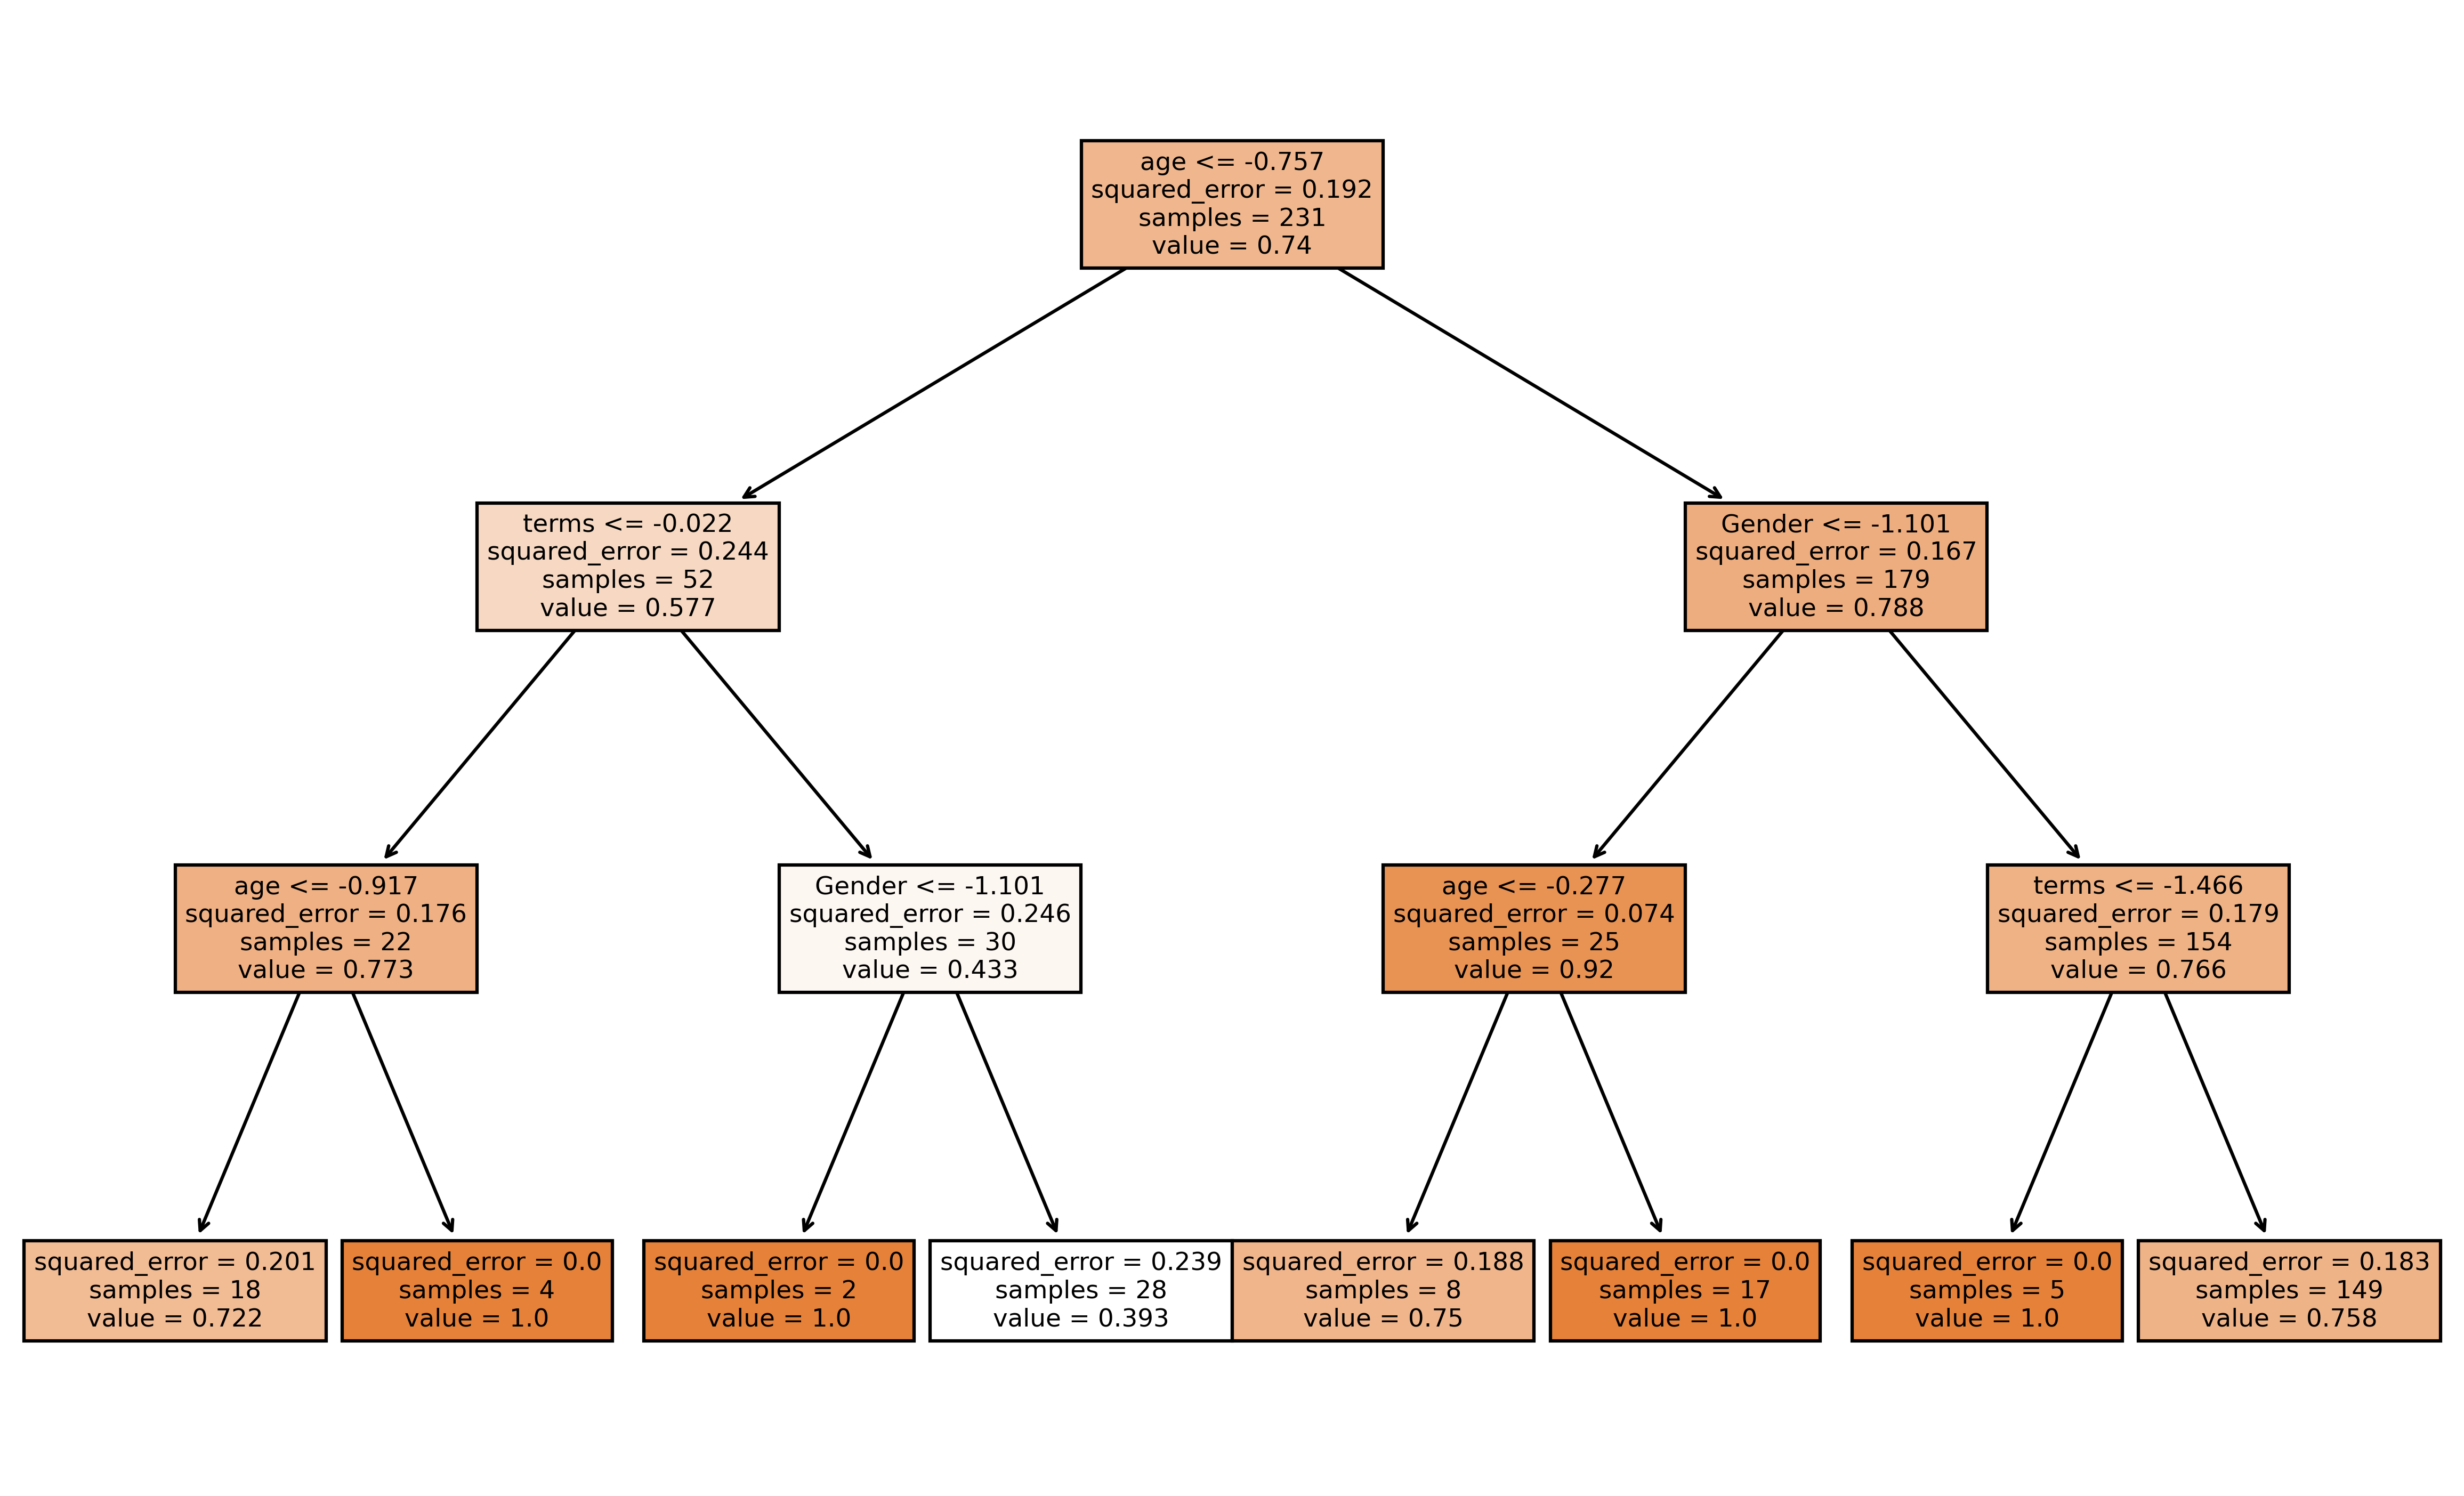

In [147]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,8), dpi=450)

_ =tree.plot_tree(regressorX,  feature_names=x.columns,  filled=True)

In [148]:
importances = regressorX.feature_importances_

importances

array([0.        , 0.32765653, 0.44757532, 0.        , 0.22476815])

In [149]:
pd.DataFrame(importances, index = x.columns, columns=["Importance"])

,Importance
Principal,0.000000
terms,0.327657
age,0.447575
education,0.000000
Gender,0.224768


<AxesSubplot:>

<Figure size 1440x1440 with 0 Axes>

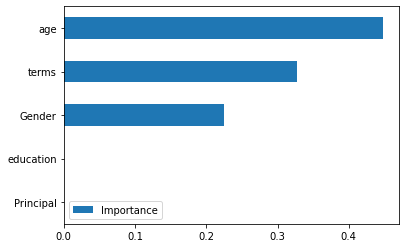

In [150]:
plt.figure(figsize=(20,20))
pd.DataFrame(importances, index = x.columns, columns=["Importance"]).sort_values(by='Importance'). plot(kind='barh')

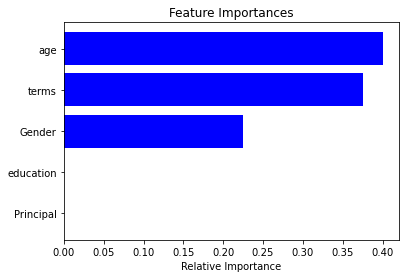

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [151]:
features = x.columns

importances = regressor.feature_importances_

indices = np.argsort(importances)


plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='b', align='center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()
plt.figure(figsize=(20,20))

#### DecisionTreeClassifier

##### f1-score 

In [152]:
# we assign the output to an object called classifier_tree.
classifier_treee = DecisionTreeClassifier(random_state=5)

In [153]:
# Here, we are using DecisionTreeClassifier as a Machine Learning model to fit the data.
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
y_predict_1 = classifier_treee.fit(X_train, Y_train).predict(X_test)

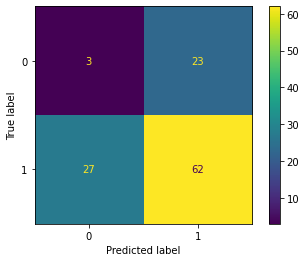

In [154]:
# We will plotting the confusion matrix.
plot_confusion_matrix(classifier_treee , X_test, Y_test)

In [155]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(Y_test, y_predict_1))

[[ 3 23]
 [27 62]]


In [156]:
# Here we have printed classification report for the classifier.
# print(classification_report(y_test, y_predict, target_names=le.classes_))
print(classification_report(Y_test, y_predict_1))

              precision    recall  f1-score   support

           0       0.10      0.12      0.11        26
           1       0.73      0.70      0.71        89

    accuracy                           0.57       115
   macro avg       0.41      0.41      0.41       115
weighted avg       0.59      0.57      0.58       115



##### jaccard_score

In [157]:
jaccard_score(Y_test, y_predict_1)

0.5535714285714286

In [158]:
jaccard_score(Y_test, y_predict_1, average='macro')

0.3050876010781671

In [159]:
jaccard_score(Y_test, y_predict_1, average=None)

array([0.05660377, 0.55357143])

#### Logestic Regression

##### f1-score 

In [160]:
# Next, we need to create our model by instantiating an instance of the LogisticRegression object.
model_1 = LogisticRegression(random_state=11)

In [161]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our 
# x_train and y_train variables
model_1.fit(X_train, Y_train)

LogisticRegression(random_state=11)

In [162]:
# Making Predictions With Our Logistic Regression Model
predictionss = model_1.predict(X_test)

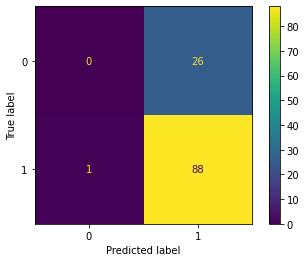

In [163]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_1, X_test, Y_test)

In [164]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(Y_test, predictionss))

[[ 0 26]
 [ 1 88]]


In [165]:
# Here we have printed classification report for the classifier.
print(classification_report(Y_test, predictionss, digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        26
           1      0.772     0.989     0.867        89

    accuracy                          0.765       115
   macro avg      0.386     0.494     0.433       115
weighted avg      0.597     0.765     0.671       115



##### jaccard_score

In [166]:
jaccard_score(Y_test, predictionss)

0.7652173913043478

In [167]:
jaccard_score(Y_test, predictionss, average='macro')

0.3826086956521739

In [168]:
jaccard_score(Y_test, predictionss, average=None)

array([0.        , 0.76521739])

#####  log loss

In [169]:
log_loss(Y_test, predictionss)

8.109284801702378

#### K-Nearest Neighbors(KNN)

##### Normal KNN 

In [170]:
# Next, we need to create our model by instantiating an instance of the K-Nearest Neighbors(KNN) object.
knnn = KNeighborsClassifier()

In [171]:
# To train the model, we need to call the fit method on the K-Nearest Neighbors(KNN) object we just created and pass in our 
# X_train and Y_train variables
knnn.fit(X_train, Y_train)

KNeighborsClassifier()

In [172]:
# Making Predictions With Our K-Nearest Neighbors(KNN) Model.
predictions_n = knnn.predict(X_test)

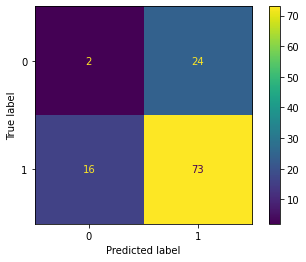

In [173]:
# We will plotting the confusion matrix.
plot_confusion_matrix(knnn, X_test, Y_test)

In [174]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(Y_test, predictions_n))

[[ 2 24]
 [16 73]]


In [175]:
# Here we have printed classification report for the classifier.
print(classification_report(Y_test, predictions_n, digits=3))

              precision    recall  f1-score   support

           0      0.111     0.077     0.091        26
           1      0.753     0.820     0.785        89

    accuracy                          0.652       115
   macro avg      0.432     0.449     0.438       115
weighted avg      0.608     0.652     0.628       115



##### jaccard_score for Normal KNN 

In [176]:
jaccard_score(Y_test, predictions_n)

0.6460176991150443

In [177]:
jaccard_score(Y_test, predictions_n, average='macro')

0.3468183733670459

In [178]:
jaccard_score(Y_test, predictions_n, average=None)

array([0.04761905, 0.6460177 ])

##### Elbow

In [179]:
test_error_rates_ = []
train_error_rates_= []

# Loop over K values

for k in range(1,10):
    knn_model_ = KNeighborsClassifier(n_neighbors=k)
    knn_model_.fit(X_train,Y_train) 
   
    y_pred____ = knn_model_.predict(X_test)
    y_pred_train_ = knn_model_.predict(X_train)
    
# Compute training and test data accuracy
    
    test_error_ = 1 - accuracy_score(Y_test,y_pred____)
    test_error_rates_.append(test_error)
    
    train_error_ = 1 - accuracy_score(Y_train,y_pred_train_)
    train_error_rates_.append(train_error_)

Text(0.5, 0, 'K Value')

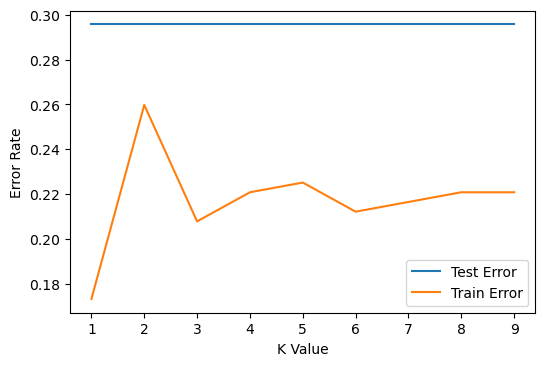

In [180]:
# we plotting Test error & Train error.
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,10),test_error_rates_,label='Test Error')

plt.plot(range(1,10),train_error_rates_,label='Train Error')

plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [181]:
# Next, we need to create our model by instantiating an instance of the K-Nearest Neighbors(KNN) Elbow object.
knn_model_ = KNeighborsClassifier(n_neighbors=32)

In [182]:
# To train the model, we need to call the fit method on the K-Nearest Neighbors(KNN) Elbow object we just created and pass 
# in our x_train and y_train variables
knn_model_.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=32)

In [183]:
# Making Predictions With Our K-Nearest Neighbors(KNN) Elbow Model.
y_pred_3_ = knn_model_.predict(X_test)

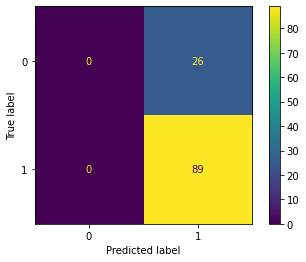

In [184]:
# We will plotting the confusion matrix.
plot_confusion_matrix(knn_model_, X_test, Y_test)

In [185]:
# Here we have printed confusion matrix for the classifier.
confusion_matrix(Y_test, y_pred_3_) 

array([[ 0, 26],
       [ 0, 89]])

In [186]:
# Here we have printed classification report for the classifier.
print(classification_report(Y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.10      0.04      0.06        26
           1       0.76      0.90      0.82        89

    accuracy                           0.70       115
   macro avg       0.43      0.47      0.44       115
weighted avg       0.61      0.70      0.65       115



##### jaccard_score for Elbow

In [187]:
jaccard_score(Y_test, y_pred_3_)

0.7739130434782608

In [188]:
jaccard_score(Y_test, y_pred_3_, average='macro')

0.3869565217391304

In [189]:
jaccard_score(Y_test, y_pred_3_, average=None)

array([0.        , 0.77391304])

#### SVM

##### Linear Kernel

###### f1_score

In [190]:
svclassifierll = SVC(kernel='linear')
svclassifierll.fit(X_train, Y_train)

SVC(kernel='linear')

In [191]:
y_predd_ = svclassifierll.predict(X_test)

In [192]:
print(confusion_matrix(Y_test,y_predd_))
print(classification_report(Y_test,y_predd_))

[[ 0 26]
 [ 0 89]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      1.00      0.87        89

    accuracy                           0.77       115
   macro avg       0.39      0.50      0.44       115
weighted avg       0.60      0.77      0.68       115



##### jaccard_score 

In [193]:
jaccard_score(Y_test,y_predd_)

0.7739130434782608

In [194]:
jaccard_score(Y_test,y_predd_, average='macro')

0.3869565217391304

In [195]:
jaccard_score(Y_test,y_predd_, average=None)

array([0.        , 0.77391304])

##### Polynomial Kernel

###### f1_score

In [196]:
svclassifierpp = SVC(kernel='poly', degree=8)
svclassifierpp.fit(X_train, Y_train)

SVC(degree=8, kernel='poly')

In [197]:
y_predpp = svclassifierpp.predict(X_test)

In [198]:
print(confusion_matrix(Y_test, y_predpp))
print(classification_report(Y_test, y_predpp))

[[ 0 26]
 [ 2 87]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      0.98      0.86        89

    accuracy                           0.76       115
   macro avg       0.38      0.49      0.43       115
weighted avg       0.60      0.76      0.67       115



###### jaccard_score 

In [199]:
jaccard_score(Y_test, y_predpp)

0.7565217391304347

In [200]:
jaccard_score(Y_test, y_predpp, average='macro')

0.3782608695652174

In [201]:
jaccard_score(Y_test, y_predpp, average=None)

array([0.        , 0.75652174])

#####  Gaussian Kernel

###### f1_score

In [202]:
svclassifiergg = SVC(kernel='rbf')
svclassifiergg.fit(X_train, Y_train)

SVC()

In [203]:
y_predgg = svclassifiergg.predict(X_test)

In [204]:
print(confusion_matrix(Y_test, y_predgg))
print(classification_report(Y_test, y_predgg))

[[ 0 26]
 [ 2 87]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      0.98      0.86        89

    accuracy                           0.76       115
   macro avg       0.38      0.49      0.43       115
weighted avg       0.60      0.76      0.67       115



###### jaccard_score 

In [205]:
jaccard_score(Y_test, y_predgg)

0.7565217391304347

In [206]:
jaccard_score(Y_test, y_predgg, average='macro')

0.3782608695652174

In [207]:
jaccard_score(Y_test, y_predgg, average=None)

array([0.        , 0.75652174])

##### Sigmoid Kernel

###### f1_score

In [208]:
svclassifierss = SVC(kernel='sigmoid')
svclassifierss.fit(X_train, Y_train)

SVC(kernel='sigmoid')

In [209]:
y_predss = svclassifierss.predict(X_test)

In [210]:
print(confusion_matrix(Y_test, y_predss))
print(classification_report(Y_test, y_predss))

[[ 0 26]
 [ 2 87]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      0.98      0.86        89

    accuracy                           0.76       115
   macro avg       0.38      0.49      0.43       115
weighted avg       0.60      0.76      0.67       115



###### jaccard_score 

In [211]:
jaccard_score(Y_test, y_predss)

0.7565217391304347

In [212]:
jaccard_score(Y_test, y_predss, average='macro')

0.3782608695652174

In [213]:
jaccard_score(Y_test, y_predss, average=None)

array([0.        , 0.75652174])

## Model Testing

#### Upload The Data

In [214]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-10-16 16:20:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-10-16 16:20:20 (95.2 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [215]:
data_test = pd.read_csv('loan_test.csv')
data_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [216]:
data_test

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
5,37,37,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male
6,38,38,PAIDOFF,1000,15,9/11/2016,9/25/2016,24,college,male
7,48,48,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male
8,50,50,PAIDOFF,800,15,9/11/2016,9/25/2016,27,college,female
9,61,61,PAIDOFF,1000,15,9/11/2016,9/25/2016,37,college,male


#### Data Tuning

In [217]:
# we will drop 'ID' column Because it does not contain any information of interest to us.
data_test.drop(['Unnamed: 0.1', 'Unnamed: 0', 'effective_date', 'due_date'], inplace= True, axis=1)
data_test

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,50,Bechalor,female
1,PAIDOFF,300,7,35,Master or Above,male
2,PAIDOFF,1000,30,43,High School or Below,female
3,PAIDOFF,1000,30,26,college,male
4,PAIDOFF,800,15,29,Bechalor,male
5,PAIDOFF,700,15,33,High School or Below,male
6,PAIDOFF,1000,15,24,college,male
7,PAIDOFF,1000,30,32,Bechalor,male
8,PAIDOFF,800,15,27,college,female
9,PAIDOFF,1000,15,37,college,male


#### Divide the Data into Categorical and Numerical

##### Categorical Data

In [218]:
# The Categorical data are columns : ['protocol_type','service','flag','Class']
categorical_data_test= data_test[['loan_status','education','Gender']]

In [219]:
# Look at categorical_data
categorical_data_test

,loan_status,education,Gender
0,PAIDOFF,Bechalor,female
1,PAIDOFF,Master or Above,male
2,PAIDOFF,High School or Below,female
3,PAIDOFF,college,male
4,PAIDOFF,Bechalor,male
5,PAIDOFF,High School or Below,male
6,PAIDOFF,college,male
7,PAIDOFF,Bechalor,male
8,PAIDOFF,college,female
9,PAIDOFF,college,male


In [220]:
# Show the shape of the categorical data.
categorical_data_test.shape

(54, 3)

In [221]:
# Chick the dtype of the categorical data.
categorical_data_test.dtypes

loan_status    object
education      object
Gender         object
dtype: object

##### Numerical Data

In [222]:
# The Numerical data is the rest of the columns.
numerical_data_test= data_test.drop(categorical_data_test, axis= 1)

In [223]:
# Look at numerical_data
numerical_data_test

,Principal,terms,age
0,1000,30,50
1,300,7,35
2,1000,30,43
3,1000,30,26
4,800,15,29
5,700,15,33
6,1000,15,24
7,1000,30,32
8,800,15,27
9,1000,15,37


In [224]:
# show the shape of numerical data.
numerical_data_test.shape

(54, 3)

In [225]:
# Chick the dtype of the numerical data.
numerical_data_test.dtypes

Principal    int64
terms        int64
age          int64
dtype: object

#### Label Encoding

##### Preprocessing

In [226]:
# We Will do preprocessing for Label Encoding.
le1_test = preprocessing.LabelEncoder()

##### fit_transform 

In [227]:
# In this step we will compute and apply the transformation in a single step.
# Create an instance of categorical_data with apply fit_transform.
label_encoder_test=categorical_data_test.apply(le1_test.fit_transform)
label_encoder_test.head(2)

,loan_status,education,Gender
0,1,0,0
1,1,2,1


In [228]:
# Look at label_encoder
label_encoder_test

,loan_status,education,Gender
0,1,0,0
1,1,2,1
2,1,1,0
3,1,3,1
4,1,0,1
5,1,1,1
6,1,3,1
7,1,0,1
8,1,3,0
9,1,3,1


In [229]:
# Look at label_encoder types
label_encoder_test.dtypes

loan_status    int64
education      int64
Gender         int64
dtype: object

In [230]:
# we Here we have created a new data frame that includes numerical_data and label_encoder.
data_label_encoded_test=pd.concat([numerical_data_test, label_encoder_test], axis=1)
data_label_encoded_test.head(2)

,Principal,terms,age,loan_status,education,Gender
0,1000,30,50,1,0,0
1,300,7,35,1,2,1


In [231]:
# Look at data_label_encoded.
data_label_encoded_test

,Principal,terms,age,loan_status,education,Gender
0,1000,30,50,1,0,0
1,300,7,35,1,2,1
2,1000,30,43,1,1,0
3,1000,30,26,1,3,1
4,800,15,29,1,0,1
5,700,15,33,1,1,1
6,1000,15,24,1,3,1
7,1000,30,32,1,0,1
8,800,15,27,1,3,0
9,1000,15,37,1,3,1


In [232]:
# Look at data_label_encoded shape.
data_label_encoded_test.shape

(54, 6)

In [233]:
test_x = data_label_encoded_test.drop(['loan_status'], axis = 1)
test_x

,Principal,terms,age,education,Gender
0,1000,30,50,0,0
1,300,7,35,2,1
2,1000,30,43,1,0
3,1000,30,26,3,1
4,800,15,29,0,1
5,700,15,33,1,1
6,1000,15,24,3,1
7,1000,30,32,0,1
8,800,15,27,3,0
9,1000,15,37,3,1


In [234]:
test_y = data_label_encoded_test['loan_status']
test_y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
Name: loan_status, dtype: int64

#### StandardScaler for data with scaling

In [235]:
scaler_test = StandardScaler()

In [236]:
testt_x = test_x.copy()

In [237]:
testt_x= scaler.fit_transform(testt_x)
testt_x

array([[ 0.49362588,  0.92844966,  3.05981865, -1.50366322, -1.97714211],
       [-3.56269116, -1.70427745,  0.53336288,  0.22394984,  0.50578054],
       [ 0.49362588,  0.92844966,  1.88080596, -0.63985669, -1.97714211],
       [ 0.49362588,  0.92844966, -0.98251057,  1.08775637,  0.50578054],
       [-0.66532184, -0.78854628, -0.47721942, -1.50366322,  0.50578054],
       [-1.24479571, -0.78854628,  0.19650211, -0.63985669,  0.50578054],
       [ 0.49362588, -0.78854628, -1.31937134,  1.08775637,  0.50578054],
       [ 0.49362588,  0.92844966,  0.02807173, -1.50366322,  0.50578054],
       [-0.66532184, -0.78854628, -0.81408019,  1.08775637, -1.97714211],
       [ 0.49362588, -0.78854628,  0.87022365,  1.08775637,  0.50578054],
       [-0.66532184, -0.78854628, -1.31937134, -0.63985669,  0.50578054],
       [-3.56269116, -1.70427745,  0.53336288,  1.08775637,  0.50578054],
       [ 0.49362588,  0.92844966, -0.14035865, -1.50366322,  0.50578054],
       [ 0.49362588,  0.92844966,  0.8

####  Data without scaling

##### DecisionTreeClassifier

###### f1-score 

In [238]:
# we assign the output to an object called classifier_tree_test.
classifier_tree_test = DecisionTreeClassifier(random_state=55)

In [239]:
classifier_tree_test.fit(x,y)

DecisionTreeClassifier(random_state=55)

In [240]:
y_predict_testt = classifier_tree_test.predict(test_x)

In [241]:
y_predict_testt

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

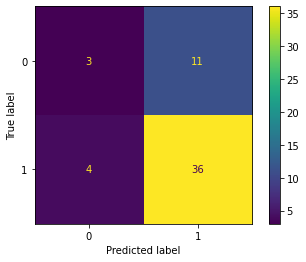

In [242]:
# We will plotting the confusion matrix.
plot_confusion_matrix(classifier_tree_test , test_x, test_y)

In [243]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(test_y, y_predict_testt))

[[ 3 11]
 [ 4 36]]


In [244]:
# Here we have printed classification report for the classifier.
# print(classification_report(y_test, y_predict, target_names=le.classes_))
print(classification_report(test_y, y_predict_testt))

              precision    recall  f1-score   support

           0       0.43      0.21      0.29        14
           1       0.77      0.90      0.83        40

    accuracy                           0.72        54
   macro avg       0.60      0.56      0.56        54
weighted avg       0.68      0.72      0.69        54



In [245]:
dtc_f1_score = f1_score(test_y, y_predict_testt)
dtc_f1_score

0.8275862068965516

###### jaccard_score

In [246]:
jaccard_score(test_y, y_predict_testt)

0.7058823529411765

In [247]:
jaccard_score(test_y, y_predict_testt, average='macro')

0.4362745098039216

In [248]:
jaccard_score(test_y, y_predict_testt, average=None)

array([0.16666667, 0.70588235])

#### Logestic Regression

##### f1-score 

In [249]:
# Next, we need to create our model by instantiating an instance of the LogisticRegression object.
model_ = LogisticRegression(random_state=1)

In [250]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our 
# x_train and y_train variables
model_.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [251]:
# Making Predictions With Our Logistic Regression Model
predictions = model_.predict(x_test)

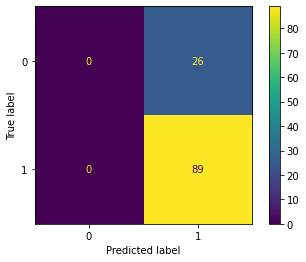

In [252]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_, x_test, y_test)

In [253]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions))

[[ 0 26]
 [ 0 89]]


In [254]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        26
           1      0.774     1.000     0.873        89

    accuracy                          0.774       115
   macro avg      0.387     0.500     0.436       115
weighted avg      0.599     0.774     0.675       115



In [255]:
lg_f1_score = f1_score(y_test, predictions)
lg_f1_score

0.8725490196078431

##### jaccard_score

In [256]:
lg_jaccard_score = jaccard_score(y_test,  predictions)
lg_jaccard_score

0.7739130434782608

In [257]:
jaccard_score(y_test,  predictions, average='macro')

0.3869565217391304

In [258]:
jaccard_score(y_test,  predictions, average=None)

array([0.        , 0.77391304])

#####  log loss

In [259]:
lg_log_loss = log_loss(y_test,  predictions)
lg_log_loss

7.808947615659678

##### K-Nearest Neighbors(KNN) 

###### Normal KNN f1_score

In [260]:
# Next, we need to create our model by instantiating an instance of the K-Nearest Neighbors(KNN) object.
knn_testt = KNeighborsClassifier()

In [261]:
#To train the model,we need to call the fit method on the K-NearestNeighbors(KNN) object we just created and pass in our 
# variables
knn_testt.fit(x, y)

KNeighborsClassifier()

In [262]:
# Making Predictions With Our K-Nearest Neighbors(KNN) Model.
predictions__testt = knn_testt.predict(test_x)

In [263]:
predictions__testt

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

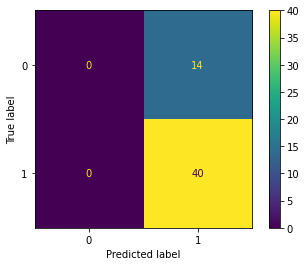

In [264]:
# We will plotting the confusion matrix.
plot_confusion_matrix(knn_testt , test_x, test_y)

In [265]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(test_y, predictions__testt))

[[ 0 14]
 [ 0 40]]


In [266]:
# Here we have printed classification report for the classifier.
# print(classification_report(y_test, y_predict, target_names=le.classes_))
print(classification_report(test_y, predictions__testt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



In [267]:
knn_f1_score = f1_score(test_y, predictions__testt)
knn_f1_score

0.851063829787234

###### Normal knn  jaccard_score

In [268]:
knn_jaccard_score = jaccard_score(test_y, predictions__testt)
knn_jaccard_score

0.7407407407407407

In [269]:
jaccard_score(test_y, predictions__testt, average='macro')

0.37037037037037035

In [270]:
jaccard_score(test_y, predictions__testt, average=None)

array([0.        , 0.74074074])

###### Elbow f1_score

In [271]:
# Next, we need to create our model by instantiating an instance of the K-Nearest Neighbors(KNN) Elbow object.
knn_model_testt = KNeighborsClassifier(n_neighbors=40)

In [272]:
# To train the model, we need to call the fit method on the K-Nearest Neighbors(KNN) Elbow object we just created and pass 
# variables
knn_model_testt.fit(x,y)

KNeighborsClassifier(n_neighbors=40)

In [273]:
# Making Predictions With Our K-Nearest Neighbors(KNN) Elbow Model.
y_pred_3_testt = knn_model_testt.predict(test_x)

In [274]:
y_pred_3_testt

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

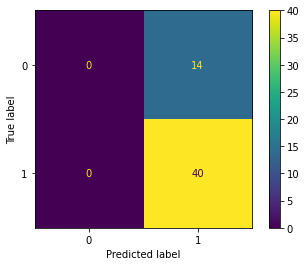

In [275]:
# We will plotting the confusion matrix.
plot_confusion_matrix(knn_model_testt , test_x, test_y)

In [276]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(test_y, y_pred_3_testt))

[[ 0 14]
 [ 0 40]]


In [277]:
# Here we have printed classification report for the classifier.
# print(classification_report(y_test, y_predict, target_names=le.classes_))
print(classification_report(test_y, y_pred_3_testt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



In [278]:
knn_elbow_f1_score = f1_score(test_y, y_pred_3_testt)
knn_elbow_f1_score

0.851063829787234

###### Elbow  jaccard_score

In [279]:
jaccard_score(test_y, y_pred_3_testt)

0.7407407407407407

In [280]:
jaccard_score(test_y, y_pred_3_testt, average='macro')

0.37037037037037035

In [281]:
jaccard_score(test_y, y_pred_3_testt, average=None)

array([0.        , 0.74074074])

#### SVM

##### Linear Kernel

###### f1_score

In [282]:
svclassifierll_test = SVC(kernel='linear')
svclassifierll_test.fit(x, y)

SVC(kernel='linear')

In [283]:
y_predd_test = svclassifierll.predict(test_x)

In [284]:
print(confusion_matrix(test_y,y_predd_test))
print(classification_report(test_y, y_predd_test))

[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



In [285]:
svmlk_f1_score = f1_score(test_y, y_predd_test)
svmlk_f1_score

0.851063829787234

##### jaccard_score 

In [286]:
svm_jaccard_score = jaccard_score(test_y, y_predd_test)
svm_jaccard_score

0.7407407407407407

In [287]:
jaccard_score(test_y, y_predd_test, average='macro')

0.37037037037037035

In [288]:
jaccard_score(test_y, y_predd_test, average=None)

array([0.        , 0.74074074])

##### Polynomial Kernel

###### f1_score

In [289]:
svclassifierpp_test = SVC(kernel='poly', degree=8)
svclassifierpp_test.fit( x, y)

SVC(degree=8, kernel='poly')

In [290]:
y_predpp_test = svclassifierpp_test.predict(test_x)

In [291]:
print(confusion_matrix(test_y, y_predpp_test))
print(classification_report(test_y, y_predpp_test))

[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



In [292]:
svmpk_f1_score = f1_score(test_y, y_predpp_test)
svmpk_f1_score

0.851063829787234

###### jaccard_score 

In [293]:
jaccard_score(test_y, y_predpp_test)

0.7407407407407407

In [294]:
jaccard_score(test_y, y_predpp_test, average='macro')

0.37037037037037035

In [295]:
jaccard_score(test_y, y_predpp_test, average=None)

array([0.        , 0.74074074])

#####  Gaussian Kernel

###### f1_score

In [296]:
svclassifiergg_test = SVC(kernel='rbf')
svclassifiergg_test.fit( x, y)

SVC()

In [297]:
y_predgg_test = svclassifiergg_test.predict(test_x)

In [298]:
print(confusion_matrix(test_y, y_predgg_test))
print(classification_report(test_y, y_predgg_test))

[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



In [299]:
svmgk_f1_score = f1_score(test_y, y_predgg_test)
svmgk_f1_score

0.851063829787234

###### jaccard_score 

In [300]:
jaccard_score(test_y, y_predgg_test)

0.7407407407407407

In [301]:
jaccard_score(test_y, y_predgg_test, average='macro')

0.37037037037037035

In [302]:
jaccard_score(test_y, y_predgg_test, average=None)

array([0.        , 0.74074074])

##### Sigmoid Kernel

###### f1_score

In [303]:
svclassifierss_test = SVC(kernel='sigmoid')
svclassifierss_test.fit(x, y)

SVC(kernel='sigmoid')

In [304]:
y_predss_test = svclassifierss_test.predict(test_x)

In [305]:
print(confusion_matrix(test_y, y_predss_test))
print(classification_report(test_y, y_predss_test))

[[ 0 14]
 [ 1 39]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      0.97      0.84        40

    accuracy                           0.72        54
   macro avg       0.37      0.49      0.42        54
weighted avg       0.55      0.72      0.62        54



In [306]:
svmsk_f1_score = f1_score(test_y, y_predss_test)
svmsk_f1_score

0.8387096774193549

###### jaccard_score 

In [307]:
jaccard_score(test_y, y_predss_test)

0.7222222222222222

In [308]:
jaccard_score(test_y, y_predss_test, average='macro')

0.3611111111111111

In [309]:
jaccard_score(test_y, y_predss_test, average=None)

array([0.        , 0.72222222])

####  Data with scaling

##### DecisionTreeClassifier

###### f1-score 

In [310]:
# we assign the output to an object called classifier_treee_testt.
classifier_treee_testt = DecisionTreeClassifier(random_state=5)

In [311]:
classifier_treee_testt.fit(X, Y)

DecisionTreeClassifier(random_state=5)

In [312]:
# Here, we are using DecisionTreeClassifier as a Machine Learning model to fit the data.
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
y_predict_1_testt = classifier_treee_testt.predict(testt_x)

In [313]:
y_predict_1_testt

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

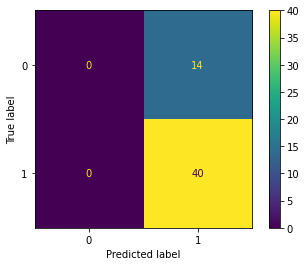

In [314]:
# We will plotting the confusion matrix.
plot_confusion_matrix(classifier_treee_testt , testt_x, test_y)

In [315]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(test_y, y_predict_1_testt))

[[ 0 14]
 [ 0 40]]


In [316]:
# Here we have printed classification report for the classifier.
# print(classification_report(y_test, y_predict, target_names=le.classes_))
print(classification_report(test_y, y_predict_1_testt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



In [317]:
dtcs_f1_score = f1_score(test_y, y_predict_1_testt)
dtcs_f1_score

0.851063829787234

###### jaccard_score

In [318]:
dtc_jaccard_score = jaccard_score(test_y, y_predict_1_testt)
dtc_jaccard_score

0.7407407407407407

In [319]:
jaccard_score(test_y, y_predict_1_testt, average='macro')

0.37037037037037035

In [320]:
jaccard_score(test_y, y_predict_1_testt, average=None)

array([0.        , 0.74074074])

#### Logestic Regression

##### f1-score 

In [321]:
# Next, we need to create our model by instantiating an instance of the LogisticRegression object.
model_1 = LogisticRegression(random_state=11)

In [322]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our 
# x_train and y_train variables
model_1.fit(X_train, Y_train)

LogisticRegression(random_state=11)

In [323]:
# Making Predictions With Our Logistic Regression Model
predictionss = model_1.predict(X_test)

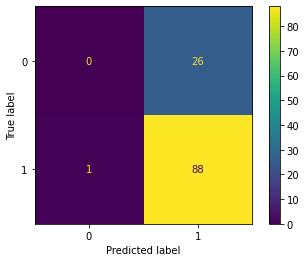

In [324]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_1, X_test, Y_test)

In [325]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(Y_test, predictionss))

[[ 0 26]
 [ 1 88]]


In [326]:
# Here we have printed classification report for the classifier.
print(classification_report(Y_test, predictionss, digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        26
           1      0.772     0.989     0.867        89

    accuracy                          0.765       115
   macro avg      0.386     0.494     0.433       115
weighted avg      0.597     0.765     0.671       115



In [327]:
lgs_f1_score = f1_score(Y_test, predictionss)
lgs_f1_score

0.8669950738916256

##### jaccard_score

In [328]:
jaccard_score(Y_test, predictionss)

0.7652173913043478

In [329]:
jaccard_score(Y_test, predictionss, average='macro')

0.3826086956521739

In [330]:
jaccard_score(Y_test, predictionss, average=None)

array([0.        , 0.76521739])

#####  log loss

In [331]:
log_loss(Y_test, predictionss)

8.109284801702378

##### K-Nearest Neighbors(KNN)

###### f1-score 

In [332]:
# Next, we need to create our model by instantiating an instance of the K-Nearest Neighbors(KNN) object.
knnn_testt = KNeighborsClassifier()

In [333]:
# To train the model, we need to call the fit method on the K-Nearest Neighbors(KNN) object we just created and pass in our 
# X_train and Y_train variables
knnn_testt.fit(X, Y)

KNeighborsClassifier()

In [334]:
# Making Predictions With Our K-Nearest Neighbors(KNN) Model.
predictions_n_testt = knnn_testt.predict(testt_x)

In [335]:
predictions_n_testt

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

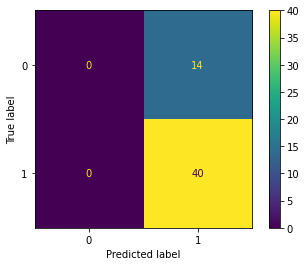

In [336]:
# We will plotting the confusion matrix.
plot_confusion_matrix(knnn_testt , testt_x, test_y)

In [337]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(test_y, predictions_n_testt))

[[ 0 14]
 [ 0 40]]


In [338]:
# Here we have printed classification report for the classifier.
# print(classification_report(y_test, y_predict, target_names=le.classes_))
print(classification_report(test_y, predictions_n_testt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



In [339]:
knns_f1_score = f1_score(test_y, predictions_n_testt)
knns_f1_score

0.851063829787234

###### jaccard_score

In [340]:
jaccard_score(test_y, predictions_n_testt)

0.7407407407407407

In [341]:
jaccard_score(test_y, predictions_n_testt, average='macro')

0.37037037037037035

In [342]:
jaccard_score(test_y, predictions_n_testt, average=None)

array([0.        , 0.74074074])

#### SVM

##### Linear Kernel

###### f1_score

In [343]:
svclassifierll_testt = SVC(kernel='linear')
svclassifierll_testt.fit(X, Y)

SVC(kernel='linear')

In [344]:
y_predd_testt = svclassifierll_testt.predict(test_x)

In [345]:
print(confusion_matrix(test_y,y_predd_testt))
print(classification_report(test_y,y_predd_testt))

[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



In [346]:
SVM_lks_f1_score = f1_score(test_y,y_predd_testt)
SVM_lks_f1_score

0.851063829787234

##### jaccard_score 

In [347]:
jaccard_score(test_y,y_predd_testt)

0.7407407407407407

In [348]:
jaccard_score(test_y,y_predd_testt, average='macro')

0.37037037037037035

In [349]:
jaccard_score(test_y,y_predd_testt, average=None)

array([0.        , 0.74074074])

##### Polynomial Kernel

###### f1_score

In [350]:
svclassifierpp_testt = SVC(kernel='poly', degree=8)
svclassifierpp_testt.fit(X, Y)

SVC(degree=8, kernel='poly')

In [351]:
y_predpp_testt = svclassifierpp_testt.predict(test_x)

In [352]:
print(confusion_matrix(test_y, y_predpp_testt))
print(classification_report(test_y, y_predpp_testt))

[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



In [353]:
SVM_pks_f1_score = f1_score(test_y, y_predpp_testt)
SVM_pks_f1_score

0.851063829787234

###### jaccard_score 

In [354]:
jaccard_score(test_y, y_predpp_testt)

0.7407407407407407

In [355]:
jaccard_score(test_y, y_predpp_testt, average='macro')

0.37037037037037035

In [356]:
jaccard_score( test_y, y_predpp_testt, average=None)

array([0.        , 0.74074074])

#####  Gaussian Kernel

###### f1_score

In [357]:
svclassifiergg_testt = SVC(kernel='rbf')
svclassifiergg_testt.fit(X, Y)

SVC()

In [358]:
y_predgg_testt = svclassifiergg_testt.predict(test_x)

In [359]:
print(confusion_matrix(test_y, y_predgg_testt))
print(classification_report(test_y, y_predgg_testt))

[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



In [360]:
SVM_gks_f1_score = f1_score(test_y, y_predgg_testt)
SVM_gks_f1_score

0.851063829787234

###### jaccard_score 

In [361]:
jaccard_score(test_y, y_predgg_testt)

0.7407407407407407

In [362]:
jaccard_score(test_y, y_predgg_testt, average='macro')

0.37037037037037035

In [363]:
jaccard_score(test_y, y_predgg_testt, average=None)

array([0.        , 0.74074074])

##### Sigmoid Kernel

###### f1_score

In [364]:
svclassifierss_testt = SVC(kernel='sigmoid')
svclassifierss_testt.fit(X, Y)

SVC(kernel='sigmoid')

In [365]:
y_predss_testt = svclassifierss_testt.predict(test_x)

In [366]:
print(confusion_matrix(test_y, y_predss_testt))
print(classification_report(test_y, y_predss_testt))

[[ 0 14]
 [ 1 39]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      0.97      0.84        40

    accuracy                           0.72        54
   macro avg       0.37      0.49      0.42        54
weighted avg       0.55      0.72      0.62        54



In [367]:
SVM_sks_f1_score = f1_score(test_y, y_predss_testt)
SVM_sks_f1_score

0.8387096774193549

###### jaccard_score 

In [368]:
jaccard_score(test_y, y_predss_testt)

0.7222222222222222

In [369]:
jaccard_score(test_y, y_predss_testt, average='macro')

0.3611111111111111

In [370]:
jaccard_score(test_y, y_predss_testt, average=None)

array([0.        , 0.72222222])

# Print Accuracy Report

In [371]:
# Print the Accuracy Report
#col_names = ['Algorithm', 'Jaccard', 'F1-score', 'LogLoss']
algorithm_list = ['KNN', 'Decision Tree', 'SVM', 'LoisticRegression']
Jaccard_list = [knn_jaccard_score, dtc_jaccard_score, svm_jaccard_score,  lg_jaccard_score]
F1_score_list = [knn_f1_score, dtcs_f1_score, svmlk_f1_score, lg_f1_score]
LogLoss_list = ['NA', 'NA', 'NA',lg_log_loss]
   
df = pd.DataFrame(list(zip(algorithm_list, Jaccard_list, F1_score_list, LogLoss_list)),
              columns=['Algorithm','Jaccard', 'F1-score', 'LogLoss'])

df.set_index('Algorithm', inplace = True)
df

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.740741,0.851064,NA
Decision Tree,0.740741,0.851064,NA
SVM,0.740741,0.851064,NA
LoisticRegression,0.773913,0.872549,7.808948
